In [34]:
# import libraries
import pandas as pd
import numpy as np

In [35]:
# load the data
path = '/home/paul/Documents/ML/forestfires/forestfires_data/forestfires.csv'
forestfires = pd.read_csv(path)

In [36]:
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [38]:
forestfires['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [39]:
forestfires['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [40]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20; Fine fuel moisture code representing the moisture content of litter
   6. DMC - DMC index from the FWI system: 1.1 to 291.3; Duff moisture code representing the average moisture content of organic layers and woody material
   7. DC - DC index from the FWI system: 7.9 to 860.6; Drought moisture code representing the average moisture content of organic layers
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in hectares (ha)): 0.00 to 1090.84


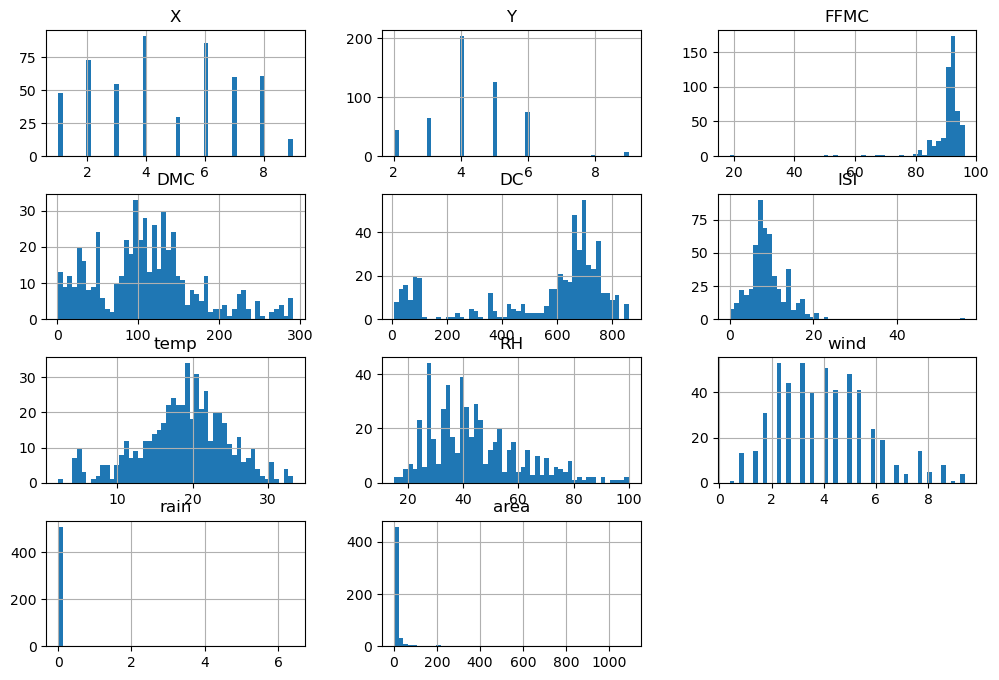

In [41]:
import matplotlib.pyplot as plt

forestfires.hist(bins=50, figsize=(12, 8))
plt.show()

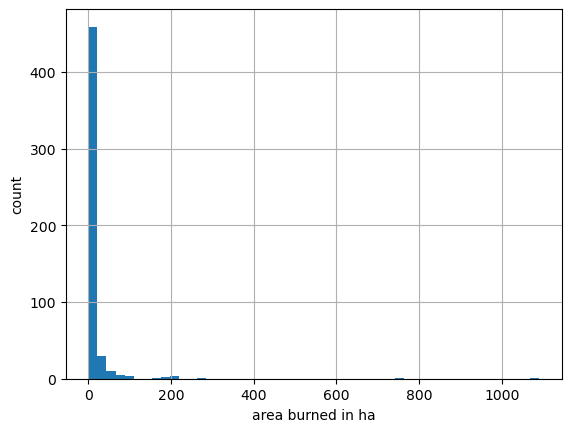

In [42]:
forestfires['area'].hist(bins=50)
plt.xlabel('area burned in ha')
plt.ylabel('count')
plt.show()

The data is heavily skewed towards 0.0

# Create a train and test set

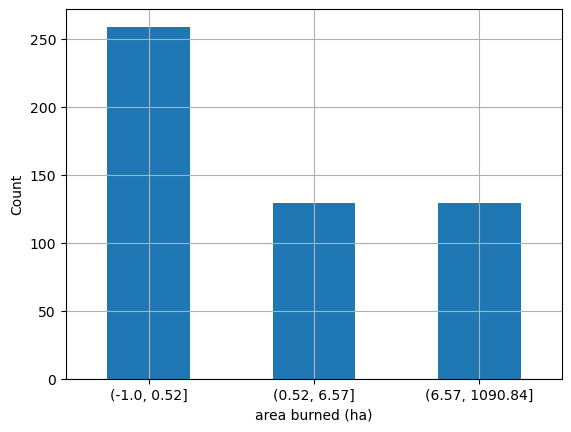

In [43]:
# put data into 3 categories based on area burned
forestfires['area_categories'] = pd.cut(forestfires['area'], bins=[-1.0, 0.52, 6.57, 1090.84])

forestfires['area_categories'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.ylabel('Count')
plt.xlabel('area burned (ha)')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

# Create a stratified train and test set based on area category
strat_train_set, strat_test_set = train_test_split(forestfires, test_size=0.2, stratify=forestfires['area_categories'], random_state=42)

In [45]:
# Compare ratio of 'area_categories'
forestfires['area_categories'].value_counts() / len(forestfires)

(-1.0, 0.52]       0.500967
(0.52, 6.57]       0.249516
(6.57, 1090.84]    0.249516
Name: area_categories, dtype: float64

In [46]:
strat_test_set['area_categories'].value_counts() / len(strat_test_set)

(-1.0, 0.52]       0.50
(0.52, 6.57]       0.25
(6.57, 1090.84]    0.25
Name: area_categories, dtype: float64

# Analysis

In [47]:
forestfires = strat_train_set.copy()

In [48]:
forestfires['log_area'] = np.log(forestfires['area'] + 1)

In [49]:
# Create new column 'burned'. 0 if area = 0.0, else 1
forestfires['burned'] = forestfires['area'].apply(lambda x: 0.0 if x == 0.0 else 1.0)

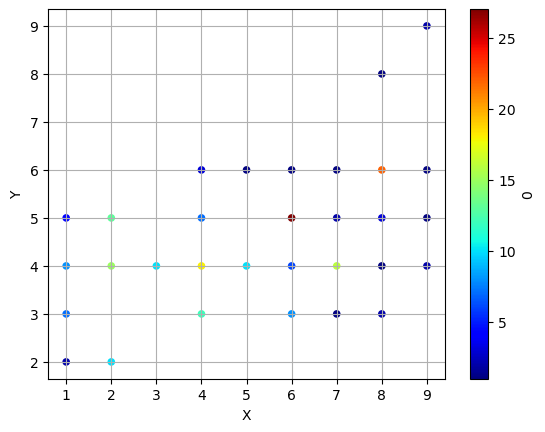

In [50]:
# Get all forest fires where burned is 1
forestfires_burned = forestfires[forestfires['burned'] != 0.0]

# Group the forestfires by their X and Y coordinate, get the count of how many are in each point, and reset the index so that we can plot it by the X and Y
forestfires_burned_count = forestfires_burned.groupby(['X', 'Y']).size().reset_index()
forestfires_burned_count.plot(kind='scatter', x='X', y='Y', grid=True, c=0, cmap='jet', colorbar=True, legend=True)
plt.show()

The graph shows that row four has more fires that have more than 0 hectares burnt than other points. Also (6,5) and (8,6) have around 20 fires that have occured.

In [51]:
forestfires = forestfires.drop('burned', axis=1)

In [52]:
correlation = forestfires.corr()
correlation['area'].sort_values(ascending=False)

area        1.000000
log_area    0.521910
temp        0.108162
DMC         0.088377
DC          0.062433
X           0.055048
FFMC        0.049271
Y           0.046656
ISI         0.016000
wind        0.007647
rain       -0.006816
RH         -0.097088
Name: area, dtype: float64

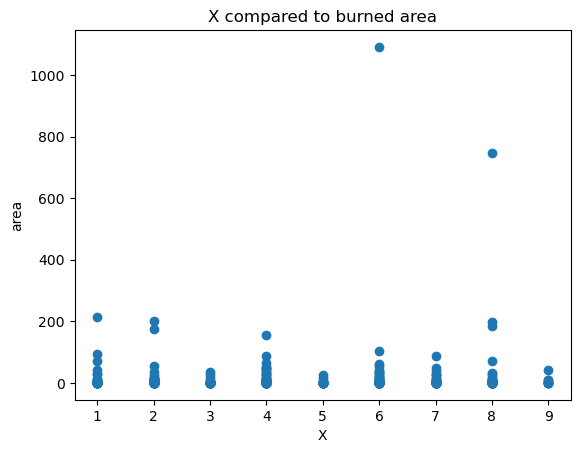

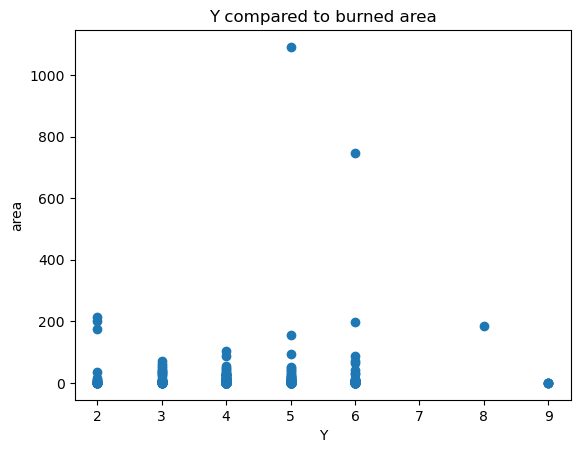

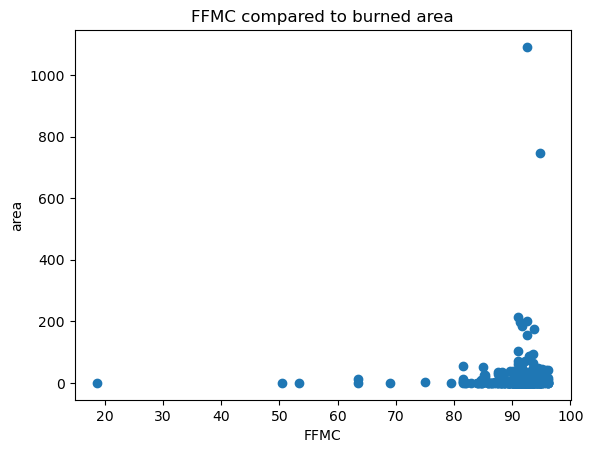

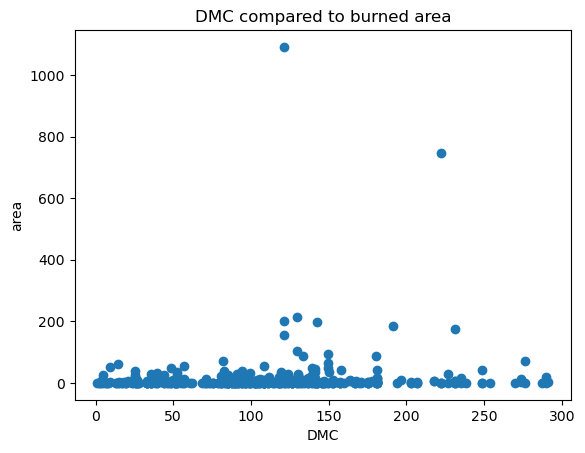

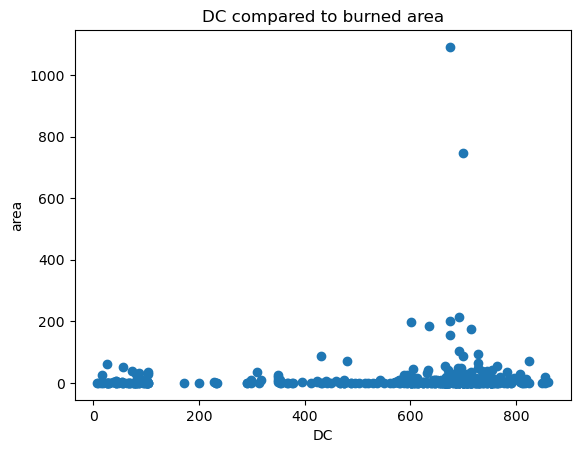

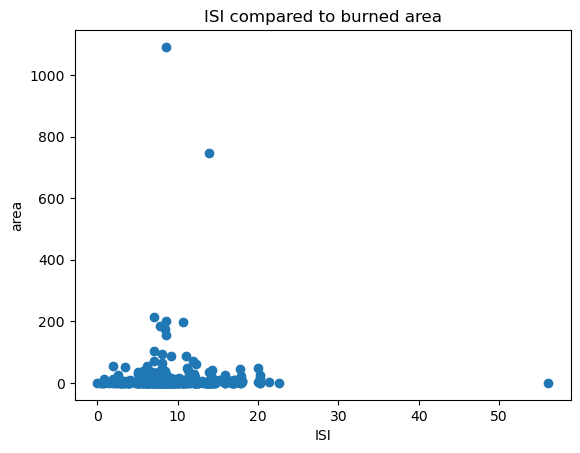

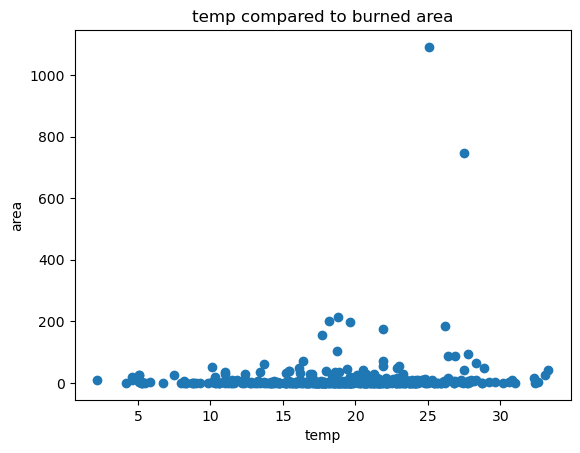

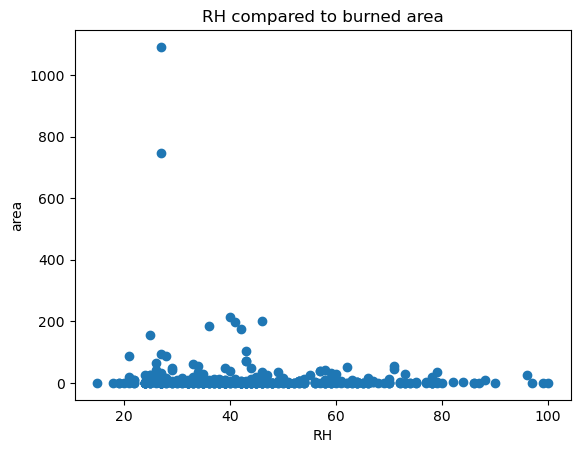

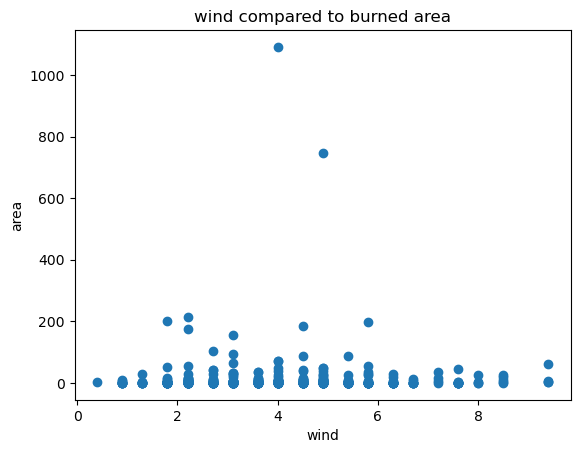

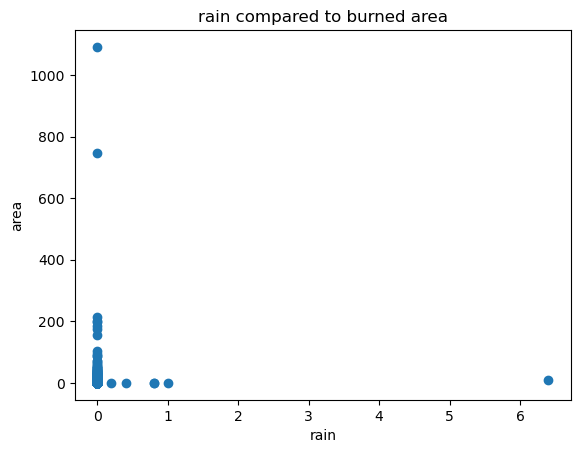

In [53]:
# Create scatterplots comparing important columns with area
columns = ['X', 'Y','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for column in columns:
    plt.scatter(forestfires[column], forestfires['area'])
    plt.title(column + ' compared to burned area')
    plt.xlabel(column)
    plt.ylabel('area')
    plt.show()
    

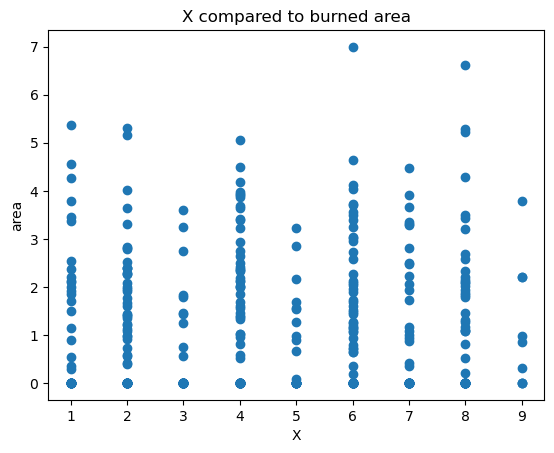

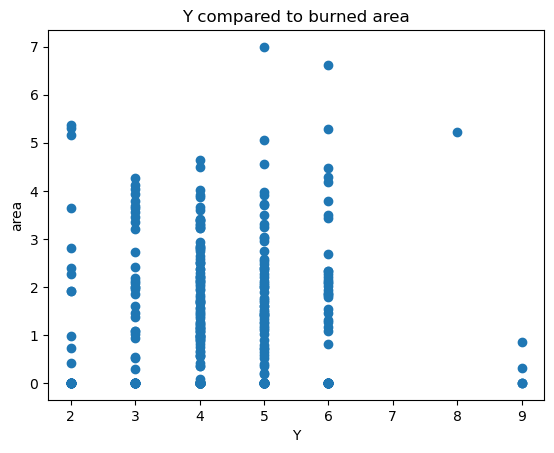

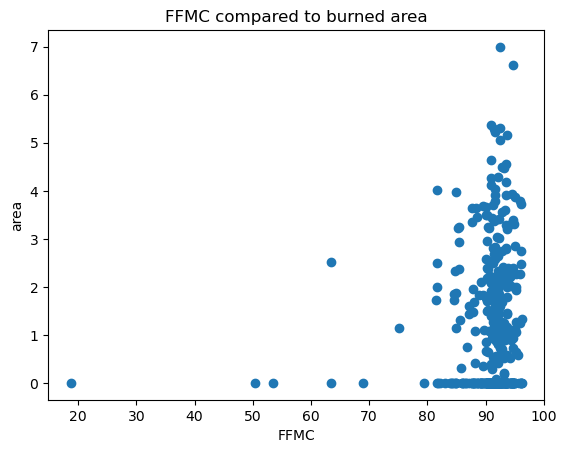

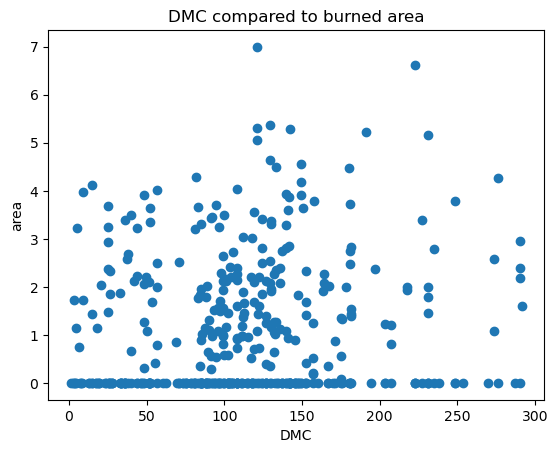

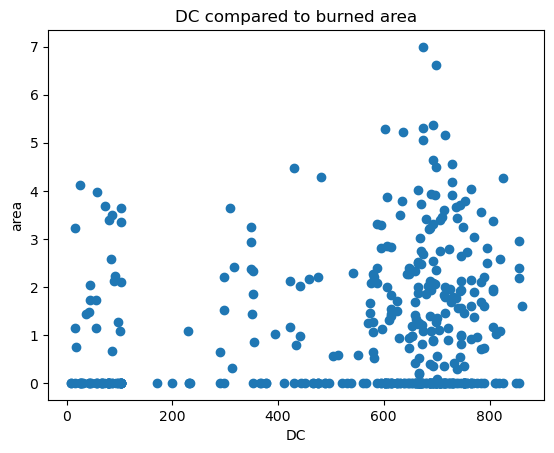

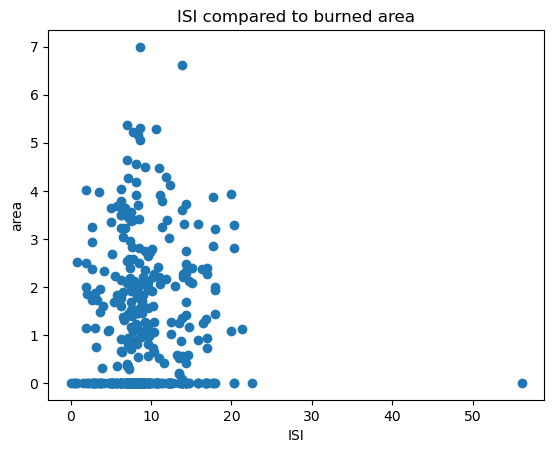

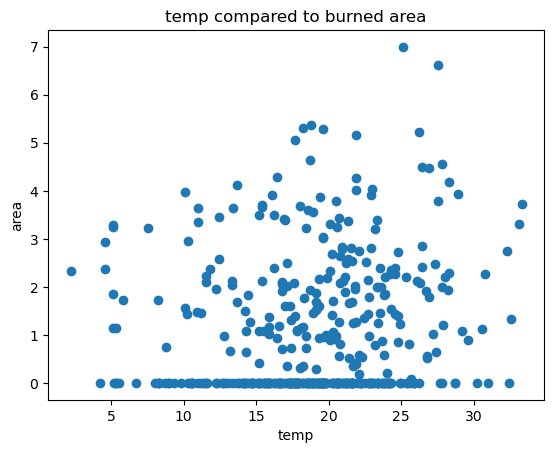

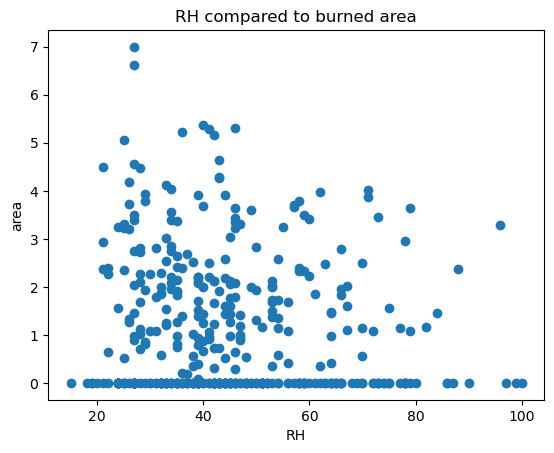

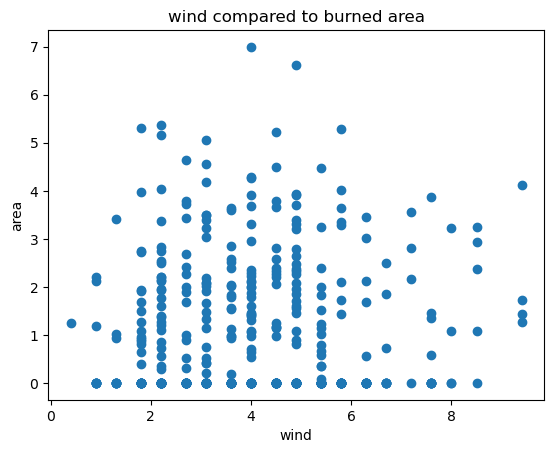

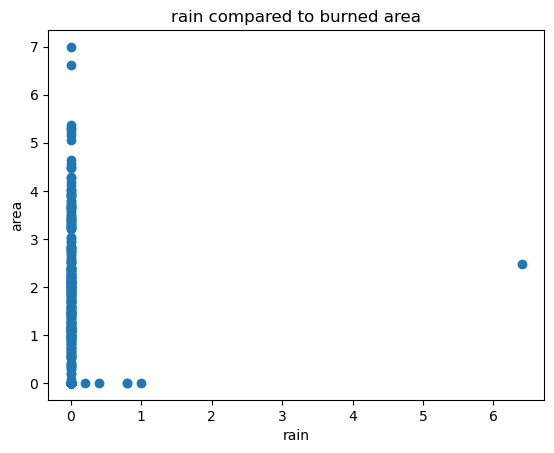

In [54]:
# do the same with the 'log_area'
for column in columns:
    plt.scatter(forestfires[column], forestfires['log_area'])
    plt.title(column + ' compared to burned area')
    plt.xlabel(column)
    plt.ylabel('area')
    plt.show()

In [55]:
correlation = forestfires.corr()
correlation['log_area'].sort_values(ascending=False)

log_area    1.000000
area        0.521910
DC          0.122051
temp        0.120139
DMC         0.113796
FFMC        0.086796
wind        0.037787
X           0.032049
rain        0.026218
ISI         0.024660
Y           0.005407
RH         -0.100301
Name: log_area, dtype: float64

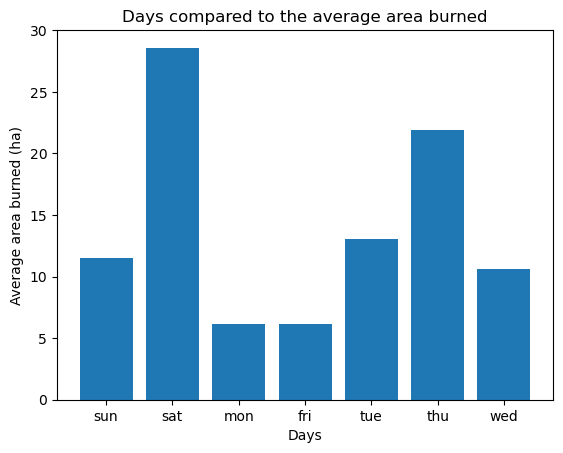

In [56]:
# find the average area burned for each day
days = forestfires['day'].unique()
avg_area_days = []
for day in days:
    avg_area_days.append(forestfires[forestfires['day'] == day]['area'].mean())

plt.bar(days, avg_area_days)
plt.title('Days compared to the average area burned')
plt.xlabel('Days')
plt.ylabel('Average area burned (ha)')
plt.show()

In [57]:
forestfires['month'].value_counts()

aug    152
sep    141
mar     43
jul     23
jun     15
feb     12
oct     11
apr      8
dec      5
jan      2
may      1
Name: month, dtype: int64

In [58]:
months = list(forestfires['month'].unique())

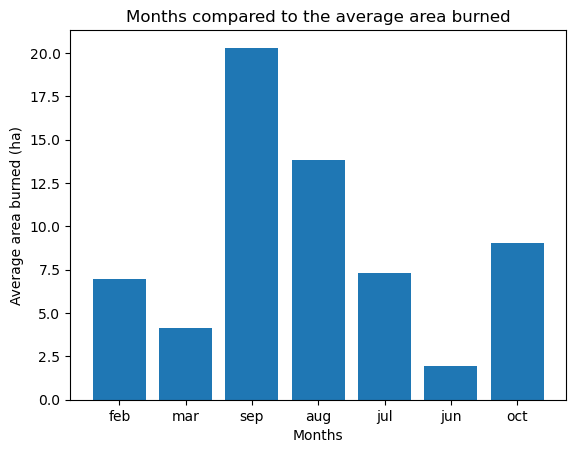

In [59]:
# drop the values that occured in the months with few values
drop_months = ['may', 'jan', 'dec', 'apr']
forestfires = forestfires[forestfires['month'].isin(drop_months) == False]

# find the average area burned for each month
months = list(forestfires['month'].unique())  
avg_area_month = []
for month in months:
    avg_area_month.append(forestfires[forestfires['month'] == month]['area'].mean())

plt.bar(months, avg_area_month)
plt.title('Months compared to the average area burned')
plt.xlabel('Months')
plt.ylabel('Average area burned (ha)')
plt.show()

# Preprocessing

In [60]:
forestfires = strat_train_set
forestfires['area'] = np.log(forestfires['area'] + 1)
strat_test_set['area'] = np.log(strat_test_set['area'] + 1)
forestfires.drop(columns='area_categories', inplace=True)

In [61]:
display(forestfires)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
395,4,5,feb,sun,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,3.966132
89,6,5,mar,sat,91.7,35.8,80.8,7.8,17.4,25,4.9,0.0,0.000000
19,6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0.0,0.000000
199,2,4,sep,mon,63.5,70.8,665.3,0.8,22.6,38,3.6,0.0,2.511224
110,4,4,mar,fri,85.9,19.5,57.3,2.8,13.7,43,5.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,1,3,aug,sat,92.1,178.0,605.3,9.6,23.3,40,4.0,0.0,1.996060
470,5,4,apr,sun,91.0,14.6,25.6,12.3,17.6,27,5.8,0.0,0.000000
252,6,5,aug,wed,93.1,157.3,666.7,13.5,22.1,37,3.6,0.0,0.190620
225,4,4,sep,sun,93.5,149.3,728.6,8.1,22.9,39,4.9,0.0,3.902982


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# create a pipeline that uses OneHotEncoder to transform the cat_columns and MinMaxScaler on the num_columns
num_columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
cat_columns = ['month', 'day']
preprocessing = ColumnTransformer([
    ('cat', OneHotEncoder(), cat_columns),
    ('minmax', MinMaxScaler(), num_columns)
])



# Train the models

In [63]:
X_train = preprocessing.fit_transform(forestfires.drop(columns='area'))
y_train = forestfires['area']

X_test = preprocessing.fit_transform(strat_test_set.drop(columns='area'))
y_test = strat_test_set['area']

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

1.9041261389745143


In [65]:
orig_mse = np.exp(mse) - 1
print(orig_mse)

5.71353836402866


In [66]:
predictions

array([ 0.109375  ,  0.6953125 ,  1.1875    ,  0.4609375 ,  0.58203125,
        0.04296875,  0.35546875,  1.23828125,  0.96875   ,  1.1171875 ,
        0.984375  ,  1.2109375 ,  1.71875   ,  2.6640625 ,  1.2109375 ,
        0.890625  ,  0.88671875,  0.75390625,  1.29296875,  1.26171875,
        0.30078125,  0.80859375,  1.30078125,  1.203125  ,  1.0234375 ,
        0.60546875,  1.4609375 ,  2.5       ,  0.6171875 ,  1.67578125,
        0.78515625,  1.5625    ,  1.15625   ,  0.44921875,  1.046875  ,
        0.98828125,  0.5       ,  2.4296875 ,  1.1015625 ,  0.828125  ,
        1.35546875,  1.1015625 ,  0.609375  ,  0.890625  ,  0.609375  ,
        0.67578125,  1.28125   ,  0.70703125,  1.59375   ,  0.85546875,
        2.44921875,  1.125     ,  1.515625  ,  1.32421875,  1.6640625 ,
        0.53125   ,  0.8359375 ,  1.546875  ,  1.60546875,  1.09375   ,
        0.25      ,  3.46875   ,  1.859375  ,  1.23046875,  1.65234375,
       -0.0703125 ,  1.734375  ,  0.48046875,  1.63671875,  1.55